In [1]:
#Add inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and read csv files

In [2]:
#Files to load
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [3]:
#to read a csv file into the DataFrame pd.read_csv()
#city file
city_data_df=pd.read_csv(city_data)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#ride file
ride_data_df=pd.read_csv(ride_data)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# inspect the city DataFrame

In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#to see if there are rows and columns that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from urban cities
(city_data_df["type"]=="Rural").sum()

18

# inspect ride DataFrame

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merging DataFrames

In [12]:
#Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# DataFrames for each type of city

In [13]:
#Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Suburban city DataFrame 
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
#Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

# Number of rides for each city type

In [15]:
#To count the number of rides for each urban cities

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [16]:
#suburban
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Average fare for each city type

In [17]:
#Urban
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
#Suburban
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
#Rural
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Average number of drivers for each city type

In [19]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [20]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Create a bubble charts

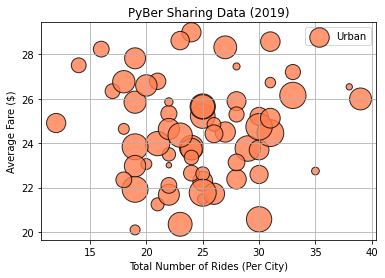

In [21]:
#build the scatter plots for urban cities
#for transparency use alpha=
plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count,
           edgecolor="black", linewidths=1,
           alpha=0.8,label= "Urban",c="coral")
plt.title("PyBer Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

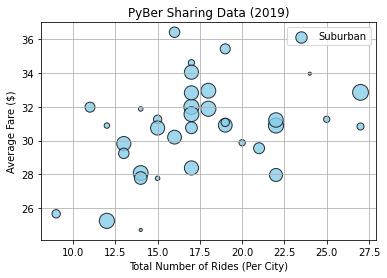

In [22]:
#Suburban Cities
plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count,
           edgecolor="black", linewidths=1,
           alpha=0.8,label= "Suburban",c="skyblue")
plt.title("PyBer Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

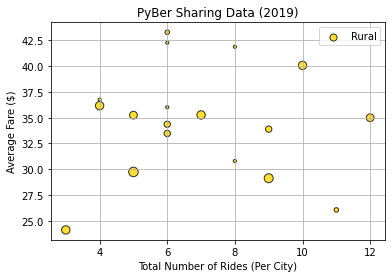

In [23]:
#Rural Cities
plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count,
           edgecolor="black", linewidths=1,
           alpha=0.8,label= "Rural",c="gold")
plt.title("PyBer Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

# Combine charts for all cities

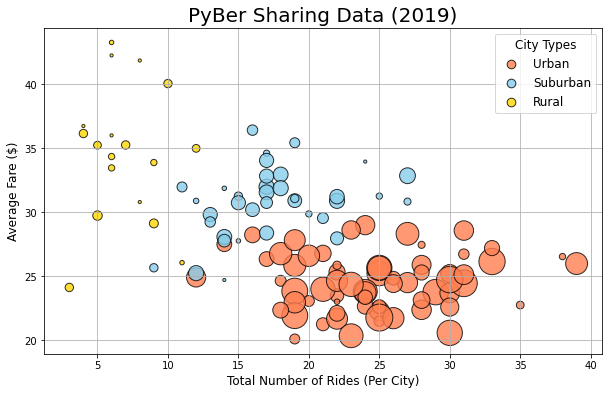

In [53]:
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count,
           edgecolor="black", linewidths=1,
           alpha=0.8,label= "Urban",c="coral")

plt.grid(True)
plt.legend()

plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count,
           edgecolor="black", linewidths=1,
           alpha=0.8,label= "Suburban",c="skyblue")
plt.grid(True)
plt.legend()

plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count,
           edgecolor="black", linewidths=1,
           alpha=0.8,label= "Rural",c="gold")

plt.title("PyBer Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)
plt.legend()

#to fix the markers size
lgnd = plt.legend(fontsize = "12", mode ="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("Resources/Fig1.png")
#Incorporate a text label about circle size
#plt.text(42,35, "Note: Circle size correlates with driver count per city.",fontsize="12")
plt.show()

# Summary statistics for number of rides by city type

# Pandas describe() function

In [25]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

# Pandas mean(), median(), and mode() methods

In [30]:
#calculate the mean for each city type

round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
#calculate the median for each city type
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [34]:
#calculate the mode

urban_ride_count.mode()
suburban_ride_count.mode()

0    17
dtype: int64

# NumPy mean() and median() functions, and SciPy mode() function

In [35]:
import numpy as np
import scipy.stats as sts

In [36]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [37]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [38]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# Urban Fares statistics

In [39]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [40]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [42]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [44]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [46]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


# Drivers statistics

In [47]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

# Create Box-and-whisker plots

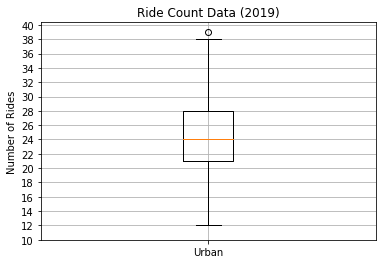

In [50]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

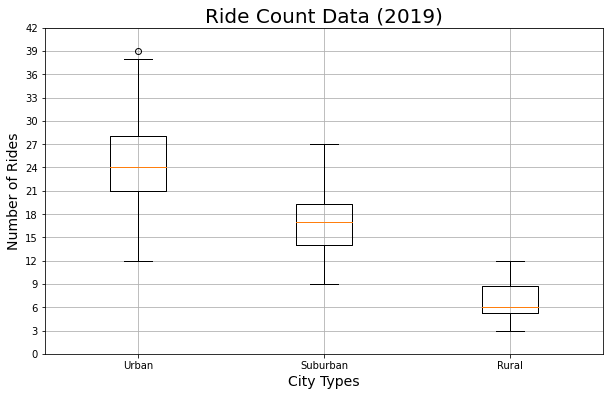

In [52]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()

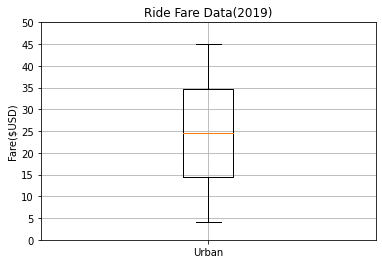

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [55]:
#Box-and_whisker plots for ride fare data

x_labels =["Urban"]
fig, ax =plt.subplots()
ax.boxplot(urban_fares,labels=x_labels)

#Add the title, y-axis label and grid

ax.set_title('Ride Fare Data(2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

# Box-and-whisker plots for driver count data

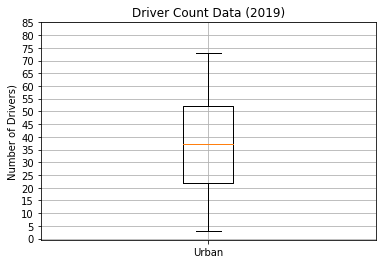

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [56]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

# Percentage of fares for each city type

In [57]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).su  m()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [58]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [59]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

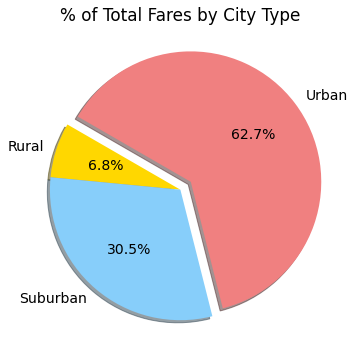

In [66]:
import matplotlib as mpl

plt.subplots(figsize=(10,6))

plt.pie(type_percents, labels = ["Rural","Suburban","Urban"],colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],
       autopct = '%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#change the default font size from 10 to 14
mpl.rcParams['font.size']=14

#Save Figure

plt.savefig("Resources/Fig5.png")

plt.show()

# Calculate ride percentage

In [70]:
sum_ride_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [71]:
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [75]:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

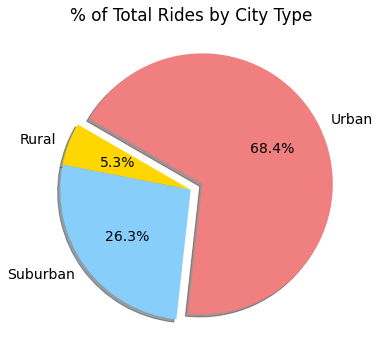

In [77]:
# Build percentage of rides by city type pie chart.

plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.

mpl.rcParams['font.size'] = 14

# Save Figure

plt.savefig("Resources/Fig6.png")

# Show Figure

plt.show()

# Driver percentage 

In [81]:
# Calculate the percentage of drivers for each city type.
drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [82]:
total_drivers = pyber_data_df["driver_count"].sum()
total_drivers

68709

In [90]:
drivers_percents = 100 * round(city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum(),3)
drivers_percents

type
Rural        2.6
Suburban    16.5
Urban       80.9
Name: driver_count, dtype: float64

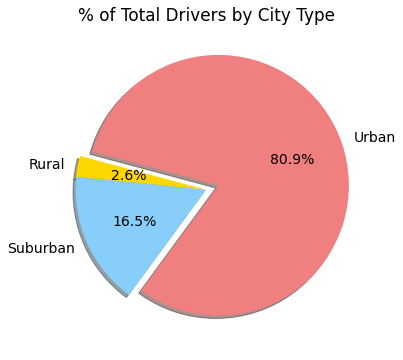

In [93]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(drivers_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resources/Fig7.png")
# Show Figure
plt.show()

In [ ]:
df1 = (df.reset_index(level=[1,2,3])
        .groupby(['month', 'week'])['Adj Close']
        .resample('W')
        .apply(percent_change))